## Colab Setup

In [1]:
!apt-get install -y libtiff5-dev &

!pip install Pillow==4.1.1
!pip install --force-reinstall scipy
!pip install --force-reinstall pandas
!pip install prompt-toolkit==1.0.15


!pip install fastai==0.7.0 
!pip install torchtext==0.2.3

!pip install kaggle --upgrade
!apt install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiffxx5
Suggested packages:
  liblzma-doc
The following NEW packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiff5-dev libtiffxx5
0 upgraded, 6 newly installed, 0 to remove and 5 not upgraded.
Need to get 628 kB of archives.
After this operation, 2,389 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libjbig0 amd64 2.1-3.1build1 [26.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtiff5 amd64 4.0.9-5 [152 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libjbig-dev amd64 2.1-3.1build1 [25.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 liblzma-dev amd64 5.2.2-1.3 [145 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtiffxx5 amd64 4.0.9-5 [5,804 B]
Get:6 http://

## Multi-label classification
http://forums.fast.ai/t/wiki-lesson-2/9399

In [2]:
# get me some data
!wget http://files.fast.ai/data/dogscats.zip
!mkdir -p data
!mv dogscats.zip data/dogscats.zip
!unzip -q -o data/dogscats.zip -d data/

--2018-11-22 18:58:20--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  40.6MB/s    in 21s     

2018-11-22 18:58:41 (39.7 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [3]:
!mkdir -p ~/.kaggle/
!echo '{"username":"cesaremontresor","key":"d18e2c82fe037ef7227d41cf457fe061"}' > ~/.kaggle/kaggle.json
!cat ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p data/planet
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p data/planet
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip -p data/planet
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f test_v2_file_mapping.csv.zip -p data/planet

!cd data/planet/; 7z x -so train-jpg.tar.7z | tar xf - 
!cd data/planet/; 7z x -so test-jpg.tar.7z | tar xf - 
!cd data/planet/; unzip -o train_v2.csv.zip
!cd data/planet/; unzip -o test_v2_file_mapping.csv.zip


{"username":"cesaremontresor","key":"5aef770ef719a2a06b6bb33b998185af"}
 98% 586M/600M [00:04<00:00, 145MB/s]
100% 600M/600M [00:04<00:00, 147MB/s]
 99% 598M/603M [00:03<00:00, 169MB/s]
100% 603M/603M [00:03<00:00, 188MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 55.1MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 41.5MB/s]
Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  
Archive:  test_v2_file_mapping.csv.zip
  inflating: test_v2_file_mapping.csv  


In [4]:
!ls
!ls data/
!ls data/planet

data  sample_data
dogscats  dogscats.zip	planet
__MACOSX	 test_v2_file_mapping.csv      train-jpg.tar.7z
test-jpg	 test_v2_file_mapping.csv.zip  train_v2.csv
test-jpg.tar.7z  train-jpg		       train_v2.csv.zip


In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [6]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
PATH = 'data/planet/'

In [8]:
ls {PATH}

__MACOSX/        test_v2_file_mapping.csv      train-jpg.tar.7z
test-jpg/        test_v2_file_mapping.csv.zip  train_v2.csv
test-jpg.tar.7z  train-jpg/                    train_v2.csv.zip


## Multi-label versus single-label classification

In [0]:
from fastai.plots import *

In [0]:
def get_1st(path): return glob(f'{path}/*.*')[0]

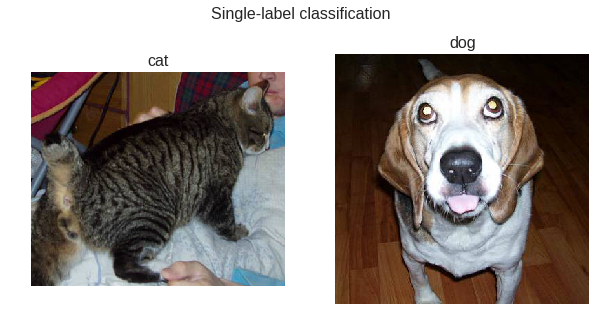

In [11]:
dc_path = "data/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

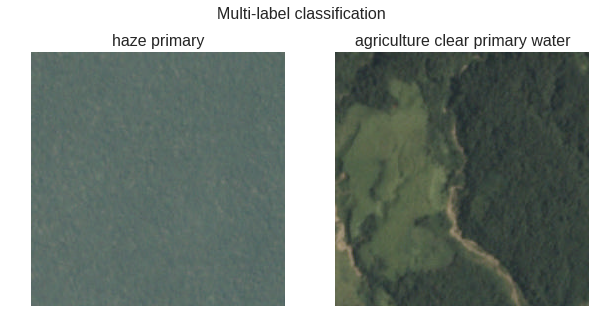

In [12]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data(path, tfms,bs,  n, cv_idx):
    val_idxs = get_cv_idxs(n, cv_idx)
    return ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', bs, tfms,
                                 suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [0]:
metrics=[f2]
f_model = resnet34

In [0]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [0]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [0]:
data = get_data(256)

In [0]:
x,y = next(iter(data.val_dl))

In [19]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [20]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

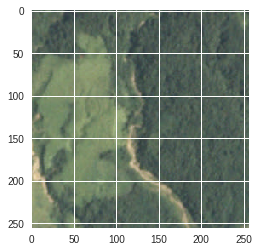

In [21]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [0]:
sz=64

In [0]:
data = get_data(sz)

In [24]:
data = data.resize(int(sz*1.3), 'tmp')

In [25]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 86880754.02it/s]


epoch      trn_loss   val_loss   f2         
    0      0.229287   0.414885   0.774013  



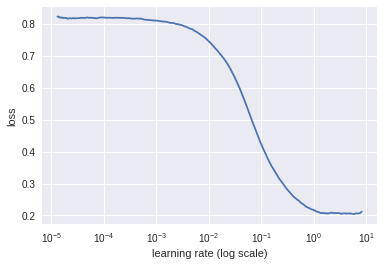

In [26]:
lrf=learn.lr_find()
learn.sched.plot()

In [0]:
lr = 0.2

In [28]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.147765   0.135021   0.881283  
    1      0.141673   0.129936   0.886363  
    2      0.138514   0.127772   0.88809   
    3      0.137675   0.126596   0.890478  
    4      0.135778   0.124584   0.892372  
    5      0.133424   0.123048   0.894338  
    6      0.131712   0.123089   0.893154  



[array([0.12309]), 0.8931543699241763]

In [0]:
lrs = np.array([lr/9,lr/3,lr])

In [30]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.120757   0.110429   0.908036  
    1      0.115137   0.105445   0.912691  
    2      0.110037   0.101531   0.915868  
    3      0.113141   0.104296   0.909641  
    4      0.105696   0.102311   0.915189  
    5      0.099919   0.099536   0.915049  
    6      0.096176   0.097591   0.917457  



[array([0.09759]), 0.9174568861653828]

In [0]:
learn.save(f'{sz}')

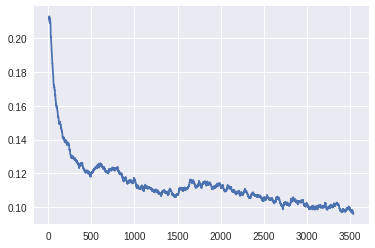

In [32]:
learn.sched.plot_loss()

In [0]:
sz=128

In [34]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.100936   0.098038   0.91605   
    1      0.096282   0.095891   0.918961  
    2      0.100013   0.094886   0.91923   
    3      0.097558   0.094784   0.918597  
    4      0.098273   0.09308    0.92135   
    5      0.096057   0.093623   0.920542  
    6      0.09384    0.093219   0.920837  



[array([0.09322]), 0.9208370239303318]

In [35]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.092193   0.088476   0.926324  
    1      0.092652   0.089223   0.92547   
    2      0.088477   0.086126   0.928143  
    3      0.094208   0.089727   0.924108  
    4      0.087813   0.086399   0.929224  
    5      0.083291   0.085095   0.929536  
    6      0.082661   0.085092   0.928098  



In [0]:
sz=256

In [37]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.090338   0.089898   0.92522   
    1      0.088836   0.089083   0.925768  
    2      0.090862   0.08852    0.925685  
    3      0.087914   0.088898   0.925429  
    4      0.089184   0.088067   0.925971  
    5      0.088789   0.087843   0.926497  
    6      0.089908   0.087513   0.926742  



[array([0.08751]), 0.9267422104521258]

In [0]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.08469    0.083779   0.930112  
    1      0.08567    0.083297   0.930726  
    2      0.083912   0.081875   0.932575  
    3      0.086369   0.08538    0.929303  
 74%|███████▎  | 372/506 [11:56<04:04,  1.82s/it, loss=0.0853]

In [0]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [0]:
f2(preds,y)

### End